In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle
import numpy as np

In [338]:
with open('test_set.pkl', 'rb') as f:
        X_test= pickle.load(f)  
with open('train_set.pkl', 'rb') as f:
        X_train= pickle.load(f)  
with open('ytest.pkl', 'rb') as f:
        y_test= pickle.load(f)  
with open('ytrain.pkl', 'rb') as f:
        y_train= pickle.load(f)  
for i in [X_train,X_test]:
    i.pop("artist_has_award")


In [369]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.pop("top10"))


In [370]:
X = X_train_sm.iloc[:,:26].values
y = y_train_sm.values

In [371]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [372]:
#Creating categorical variables 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = y.reshape(-1,1)
y = ohe.fit_transform(y).toarray()

In [375]:
#Neural Net
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_dim=26, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

model = get_compiled_model()
model.fit(X, y, epochs=10, batch_size=64)
model.save("neuralnet1.h5")

Train on 10940 samples
Epoch 1/10
10940/10940 [==============================] - 6s 574us/sample - loss: 0.0337 - accuracy: 0.9895
Epoch 2/10
10940/10940 [==============================] - 6s 586us/sample - loss: 0.0075 - accuracy: 0.9988
Epoch 3/10
10940/10940 [==============================] - 6s 556us/sample - loss: 2.1519e-05 - accuracy: 1.0000
Epoch 4/10
10940/10940 [==============================] - 5s 484us/sample - loss: 5.9347e-06 - accuracy: 1.0000
Epoch 5/10
10940/10940 [==============================] - 5s 486us/sample - loss: 4.5604e-06 - accuracy: 1.0000
Epoch 6/10
10940/10940 [==============================] - 5s 491us/sample - loss: 1.2240e-06 - accuracy: 1.0000
Epoch 7/10
10940/10940 [==============================] - 6s 543us/sample - loss: 5.2863e-07 - accuracy: 1.0000
Epoch 8/10
10940/10940 [==============================] - 6s 574us/sample - loss: 1.4103e-08 - accuracy: 1.0000
Epoch 9/10
10940/10940 [==============================] - 6s 513us/sample - loss: 2.3212e

In [ ]:
# predictions = model.predict(X_test.iloc[:,:26].values)
# predictions

In [ ]:
# nn_probs = predictions[:,1]
# nn_probs

In [348]:
import sklearn.metrics as metrics

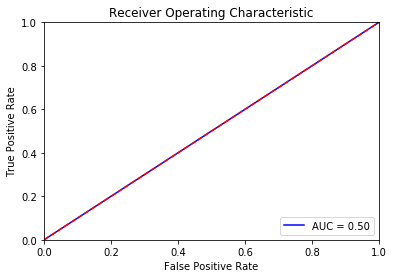

In [378]:
#ROC Curve
fpr, tpr, threshold = metrics.roc_curve(y_test, nn_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("NN")
plt.show()

In [379]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

predictions_matrix = [1 if pred > 0.65 else 0 for pred in nn_probs]
confusion_matrix(y_test,predictions_matrix)

array([[1506,    0],
       [  96,    0]], dtype=int64)

In [388]:
# #Boostrapping the results
# from sklearn.utils import resample
# df = X_test.copy()
# df["top10"] = y_test.values
# stats = list()
# for i in range(1000):
#     boot = resample(df, replace=True, n_samples=10000)
#     boot_y = boot.pop("top10")
#     boot_pred = model.predict(boot.iloc[:,:26].values)
#     pro = boot_pred[:,1]
#     predictions_matrix = [1 if pred > 0.65 else 0 for pred in pro]
#     precision = (confusion_matrix(boot_y,predictions_matrix)[1][1]) / (confusion_matrix(boot_y,predictions_matrix)[0][1] + confusion_matrix(boot_y,predictions_matrix)[0][1]) 
#     stats.append(precision)
    
# # plot scores
# plt.hist(stats)
# plt.show()
# # confidence intervals
# alpha = 0.95
# p = ((1.0-alpha)/2.0) * 100
# lower = max(0.0, np.percentile(stats, p))
# p = (alpha+((1.0-alpha)/2.0)) * 100
# upper = min(1.0, np.percentile(stats, p))
# print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))